<a href="https://colab.research.google.com/github/OseiasBeu/TCC_Dta_Science/blob/main/pipeline_data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das bibliotecas

In [176]:
import nltk
import re
from nltk.corpus import wordnet
from nltk import FreqDist
from nltk.corpus import brown
import pandas as pd

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

import logging
logging.basicConfig(filename='example.log', filemode='w', level=logging.DEBUG)

## Entrada de dados! 

É nessa parte do script por onde as API's serão consultadas e as bases serão lidas.

In [158]:
def load_dataframe(link):
  try:
    logger.info('Efetuando o carregamento do datafreme.')
    file = link
    dataBase = pd.read_csv(file, sep=';', header=None)
    df = pd.DataFrame(dataBase)
    logger.info('Carregamento efetuado com sucesso!')
    return df
  except Exception as e:
    logger.error(f'Houve um erro no carregamento do dataset: {e}')

## Verificando a frequência das palavras

In [159]:
def array_to_word_list(lista_de_frases):
  logger.info('Convertendo lista de frases em lista de palavras.')
  try:
    lista_de_palavras = []
    for x in lista_de_frases:
      lista_de_palavras += x.split()
    logger.info('Lista de palavras gerada com sucesso!')
    return lista_de_palavras
  except Exception as e:
    logger.error(f'Houve um erro na conversão:{e}')

In [160]:
def freq_word(array_lista_de_palavras):
  logger.info("Gerando frequência de palavras.")
  try:
    frequencia_de_palavras = FreqDist(lista_de_palavras)
    logger.info("Frequência de palavras gerada com sucesso!")
    return frequencia_de_palavras
  except Exception as e:
    logger.error(f'Houve um erro na geração da frequência das palavras: {e}')

In [161]:
def plot_freq_word(frequencia_de_palavras):
  logger.info("Gerando gráfico de frequência de palavras")
  try:
    palavras = frequencia_de_palavras.keys()
    y_pos = np.arange(len(palavras))
    contagem = frequencia_de_palavras.values()
    plt.bar(y_pos, contagem, align='center', alpha=0.5)
    plt.xticks(y_pos, palavras)
    plt.ylabel('Frequencia')
    plt.title('Frequencia das palavras na frase')
    logger.info('Gráfico Gerado com sucesso!')
    plt.show()
  except Exception as e:
    logger.error(f"Houve um erro na plotagem da frequência das palavras: {e}")

## Removendo a stop_words

* Palavras ou termos que são muito usadas mas normalmente não tem nenhum significado como artigos: 'é','o','a'
* Técnica usada para pré-processamento de dados

In [162]:
def RemoveStopWords(instancia):
  logger.info('Removendo Stop Words')
  try:
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i.lower() for i in instancia if not i in stopwords]
    logger.info("Stop Wrods removidas com sucesso!")
    return (" ".join(palavras))
  except Exception as e:
    logger.error(f"Houve um erro na remoção das stop words: {e}")

## Analise de sentimento

In [163]:
def phrases_polarity(array_lines):
  logger.info('Efetuando a análise de sentimento.')
  try:
    dict = {}
    key = 0
    for line in array_lines:
      frase = TextBlob(line)
      frase2 = TextBlob.translate(frase)
      dict[key] = {'frase_original': frase, 'frase_traduzida': frase2, 'polaridade':frase2.sentiment[0],'subjetividade':frase2.sentiment[1]}
      key+=1
      logger.info('Dicionario com polaridades gerado com sucesso!')
      # print(f'Sentimento:-> Polaridade: {frase2.sentiment[0]} Subjetividade: {frase2.sentiment[1]} <==> Frase Original: {frase} <==> Frase traduzida: {frase2}')
    return dict
  except Exception as e:
    logger.error(f'Houve um erro na análise de sentimento: {e}')

## PIPELINE

2021-07-22 02:08:21,463 - Log de execução: - INFO - Efetuando o carregamento do datafreme.
2021-07-22 02:08:21,463 - Log de execução: - INFO - Efetuando o carregamento do datafreme.
2021-07-22 02:08:21,463 - Log de execução: - INFO - Efetuando o carregamento do datafreme.
2021-07-22 02:08:21,463 - Log de execução: - INFO - Efetuando o carregamento do datafreme.
INFO:Log de execução::Efetuando o carregamento do datafreme.
2021-07-22 02:08:21,518 - Log de execução: - INFO - Carregamento efetuado com sucesso!
2021-07-22 02:08:21,518 - Log de execução: - INFO - Carregamento efetuado com sucesso!
2021-07-22 02:08:21,518 - Log de execução: - INFO - Carregamento efetuado com sucesso!
2021-07-22 02:08:21,518 - Log de execução: - INFO - Carregamento efetuado com sucesso!
INFO:Log de execução::Carregamento efetuado com sucesso!
2021-07-22 02:08:21,535 - Log de execução: - INFO - Convertendo lista de frases em lista de palavras.
2021-07-22 02:08:21,535 - Log de execução: - INFO - Convertendo list

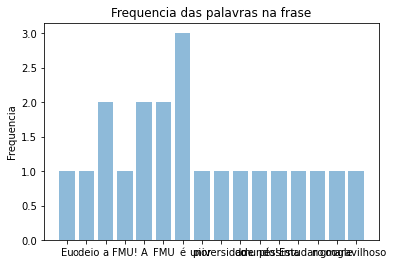

In [184]:
df = load_dataframe('https://raw.githubusercontent.com/OseiasBeu/TCC_Dta_Science/main/datasets/news.csv')
lista_de_frases = df[0].to_list()
lista_de_frases = ['Eu odeio a FMU!','A FMU é a pior universidade do mundo!','A FMU é péssima','Estudar no google é maravilhoso']
lista_de_palavras = array_to_word_list(lista_de_frases)
lista_de_palavras_s_stop_words = RemoveStopWords(lista_de_palavras)
frequencia_de_palavras = freq_word(lista_de_palavras_s_stop_words.split())
plot_freq_word(frequencia_de_palavras)

In [185]:
frases_com_sentimento = phrases_polarity(lista_de_frases)

2021-07-22 02:08:23,140 - Log de execução: - INFO - Efetuando a análise de sentimento.
2021-07-22 02:08:23,140 - Log de execução: - INFO - Efetuando a análise de sentimento.
2021-07-22 02:08:23,140 - Log de execução: - INFO - Efetuando a análise de sentimento.
2021-07-22 02:08:23,140 - Log de execução: - INFO - Efetuando a análise de sentimento.
INFO:Log de execução::Efetuando a análise de sentimento.
2021-07-22 02:08:23,254 - Log de execução: - INFO - Dicionario com polaridades gerado com sucesso!
2021-07-22 02:08:23,254 - Log de execução: - INFO - Dicionario com polaridades gerado com sucesso!
2021-07-22 02:08:23,254 - Log de execução: - INFO - Dicionario com polaridades gerado com sucesso!
2021-07-22 02:08:23,254 - Log de execução: - INFO - Dicionario com polaridades gerado com sucesso!
INFO:Log de execução::Dicionario com polaridades gerado com sucesso!
2021-07-22 02:08:23,358 - Log de execução: - INFO - Dicionario com polaridades gerado com sucesso!
2021-07-22 02:08:23,358 - Log d

In [188]:
for i in frases_com_sentimento:
  print(f'Frase: {frases_com_sentimento[i]["frase_original"]}\n Polaridade:{frases_com_sentimento[i]["polaridade"]} | Subjetividade:{frases_com_sentimento[i]["subjetividade"]} \n')

Frase: Eu odeio a FMU!
 Polaridade:-1.0 | Subjetividade:0.9 

Frase: A FMU é a pior universidade do mundo!
 Polaridade:-1.0 | Subjetividade:1.0 

Frase: A FMU é péssima
 Polaridade:-1.0 | Subjetividade:1.0 

Frase: Estudar no google é maravilhoso
 Polaridade:1.0 | Subjetividade:1.0 

